<a href="https://colab.research.google.com/github/physicaone/loss_IG/blob/master/%5B210617%5Dvisual_results2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    base='drive/MyDrive'
except:
    base='Google Drive'

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
n_hid_list=[1,2,4,8]
T_list=[1.47, 2.3, 3.2, 14.8]

In [4]:
cum1=[]; cum2=[]; means=[]
for T in T_list:
    tmp1=[]; tmp2=[]; tmp3=[]
    S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_T={T}_S.pkl'.format(base=base, T=T))
    for n_hid in n_hid_list:
        bias_2nd_cumulant1=0; bias_2nd_cumulant2=0
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT5_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_hid=n_hid, T=T))
        FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_n_hid={n_hid}_T={T}_FE_V.pkl'.format(base=base, n_hid=n_hid, T=T))
        bias_CM=-S['CM']-FE['CM']+FE_V['CM']
        bias_mean=0
        for m in range(10):
            bias_CM_m=-S['CM_m'][str(m)]-FE['CM_m'][str(m)]+FE_V['CM_m'][str(m)]
            for n in range(10):
                bias_tmp_mn=-S['CM']-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)]
                bias_2nd_cumulant1+=(bias_CM-bias_tmp_mn)**2 
                bias_2nd_cumulant2+=(bias_CM_m-bias_tmp_mn)**2
                bias_mean+=bias_tmp_mn/100
        tmp1.append(bias_2nd_cumulant1)
        tmp2.append(bias_2nd_cumulant2)
        tmp3.append(bias_mean)
    cum1.append(tmp1)
    cum2.append(tmp2)
    means.append(tmp3)

([<matplotlib.axis.XTick at 0x7f8a4998f150>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '4'), Text(0, 0, '8')])

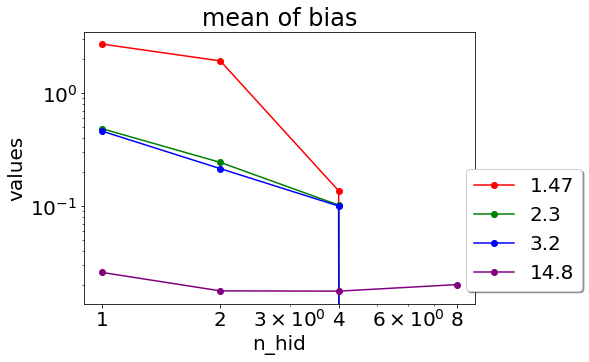

In [5]:
plt.rcParams["font.size"] = "20"
plt.figure(figsize=(7,5))

plt.title('mean of bias')
plt.xscale('log'); plt.yscale('log')
# CM
plt.plot(n_hid_list, means[0], '-o', c='r', label = T_list[0])
plt.plot(n_hid_list, means[1], '-o', c='g', label = T_list[1])
plt.plot(n_hid_list, means[2], '-o', c='blue', label = T_list[2])
plt.plot(n_hid_list, means[3], '-o', c='purple', label = T_list[3])

plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.01), 
           ncol=1, fancybox=True, shadow=True)
plt.xlabel('n_hid')
plt.ylabel('values')
plt.xticks([1,2,4,8],n_hid_list)

([<matplotlib.axis.XTick at 0x7f8a3c2ae790>,
 [Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '4'), Text(0, 0, '8')])

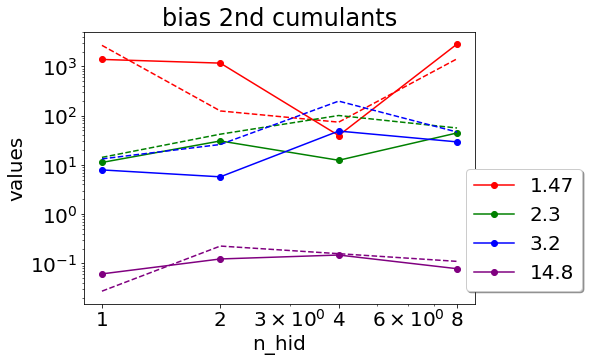

In [6]:
plt.rcParams["font.size"] = "20"
plt.figure(figsize=(7,5))

plt.title('bias 2nd cumulants')
plt.xscale('log'); plt.yscale('log')
# CM
plt.plot(n_hid_list, cum1[0], '-o', c='r', label = T_list[0])
plt.plot(n_hid_list, cum1[1], '-o', c='g', label = T_list[1])
plt.plot(n_hid_list, cum1[2], '-o', c='blue', label = T_list[2])
plt.plot(n_hid_list, cum1[3], '-o', c='purple', label = T_list[3])
# CM_m
plt.plot(n_hid_list, cum2[0], '--', c='r')
plt.plot(n_hid_list, cum2[1], '--', c='g')
plt.plot(n_hid_list, cum2[2], '--', c='blue')
plt.plot(n_hid_list, cum2[3], '--', c='purple')
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.01), 
           ncol=1, fancybox=True, shadow=True)
plt.xlabel('n_hid')
plt.ylabel('values')
plt.xticks([1,2,4,8],n_hid_list)

In [7]:
std1=[]; std2=[]; mean1=[]
for T in T_list:
    tmp1=[]; tmp2=[]; tmp3=[]
    S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_T={T}_S.pkl'.format(base=base, T=T))
    for n_hid in n_hid_list:
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT5_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_hid=n_hid, T=T))
        FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_n_hid={n_hid}_T={T}_FE_V.pkl'.format(base=base, n_hid=n_hid, T=T))
        list_CM=[]; list_CM_m_std=[]; list_bias=[]
        for m in range(10):
            list_CM_m=[]
            for n in range(10):
                bias_mn=-S['CM_m'][str(m)]-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)]
                list_CM.append(bias_mn); list_CM_m.append(bias_mn)
                list_bias.append(bias_mn)
            list_CM_m_std.append(np.std(list_CM_m))
        tmp1.append(np.std(list_CM))
        tmp2.append(np.mean(list_CM_m_std))
        tmp3.append(np.mean(list_bias))
    std1.append(tmp1)
    std2.append(tmp2)
    mean1.append(tmp3)
# CM, CM_m을 이상모델 삼은 IG variance의 표준편차

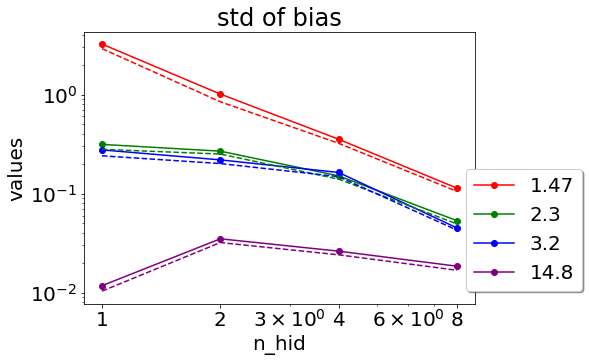

In [8]:
plt.rcParams["font.size"] = "20"
plt.figure(figsize=(7,5))

plt.xlabel('n_hid')
plt.ylabel('values')
plt.title('std of bias')
plt.xscale('log'); plt.yscale('log')
# CM
plt.plot(n_hid_list, std1[0], '-o', c='r', label = 1.47)
plt.plot(n_hid_list, std1[1], '-o', c='g', label = 2.3)
plt.plot(n_hid_list, std1[2], '-o', c='blue', label = 3.2)
plt.plot(n_hid_list, std1[3], '-o', c='purple', label = 14.8)
# CM_m
plt.plot(n_hid_list, std2[0], '--', c='r')
plt.plot(n_hid_list, std2[1], '--', c='g')
plt.plot(n_hid_list, std2[2], '--', c='blue')
plt.plot(n_hid_list, std2[3], '--', c='purple')
plt.xticks([1,2,4,8],n_hid_list)
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.01), 
           ncol=1, fancybox=True, shadow=True)
plt.show()

In [9]:
Var1=[]; Var2=[]
for T in T_list:
    tmp1=[]; tmp2=[]
    for n_hid in n_hid_list:
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT5_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_hid=n_hid, T=T))
        dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT5_n_hid={n_hid}_T={T}_dE.pkl'.format(base=base, n_hid=n_hid, T=T))
        Variance1=0; Variance2=0
        for m in range(10):
            for n in range(10):
                Variance1+=(dE['CM'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM'])/100
                Variance2+=(dE['CM_m'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM_m'][str(m)])/100
        tmp1.append(Variance1)
        tmp2.append(Variance2)
    Var1.append(tmp1)
    Var2.append(tmp2)
# CM, CM_m을 이상모델 삼은 IG variance의 표준편차

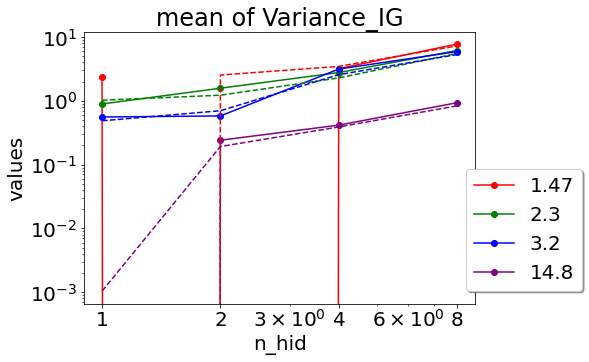

In [10]:
plt.rcParams["font.size"] = "20"
plt.figure(figsize=(7,5))

plt.xlabel('n_hid')
plt.ylabel('values')
plt.title('mean of Variance_IG')
plt.xscale('log'); plt.yscale('log')
# CM
plt.plot(n_hid_list, Var1[0], '-o', c='r', label = 1.47)
plt.plot(n_hid_list, Var1[1], '-o', c='g', label = 2.3)
plt.plot(n_hid_list, Var1[2], '-o', c='blue', label = 3.2)
plt.plot(n_hid_list, Var1[3], '-o', c='purple', label = 14.8)
# CM_m
plt.plot(n_hid_list, Var2[0], '--', c='r')
plt.plot(n_hid_list, Var2[1], '--', c='g')
plt.plot(n_hid_list, Var2[2], '--', c='blue')
plt.plot(n_hid_list, Var2[3], '--', c='purple')
plt.xticks([1,2,4,8],n_hid_list)
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.01), 
           ncol=1, fancybox=True, shadow=True)
plt.show()

In [11]:
def get_df(T):
    dict0={}
    for m in range(10):
        dict0[str(m)]=[]
        for n in range(10):
            value1=[]; value2=[]; bias_list=[]
            for n_hid in [1,2,4,8]:
                FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT5_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_hid=n_hid, T=T))
                FE_V=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_n_hid={n_hid}_T={T}_FE_V.pkl'.format(base=base, n_hid=n_hid, T=T))
                dE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT5_n_hid={n_hid}_T={T}_dE.pkl'.format(base=base, n_hid=n_hid, T=T))
                S=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_T={T}_S.pkl'.format(base=base, T=T))

                value1.append(np.round(dE['CM_m'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM_m'][str(m)],3))
                value2.append(np.round(dE['CM'][str(m)][str(n)]-FE['mn'][str(m)][str(n)]+FE['CM'],3))
                bias_list.append(np.round(-S['CM_m'][str(m)]-FE['mn'][str(m)][str(n)]+FE_V['mn'][str(m)][str(n)],3))

            dict0[str(m)].append({'var_CM':value2, 'var_CM_m':value1, 'bias':bias_list})
    df = pd.DataFrame(data=dict0)
    pd.set_option('display.max_colwidth', None)
    return df


In [12]:
# df.to_csv('{base}/loss_IG/3*3/data/3*3_PT20_0.1M_T={T}_dataframe.csv'.format(base=base, T=T), index=range(10))

In [13]:
Bias_dict={}
for T in T_list:
    df=get_df(str(T))
    Bias_dict[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Bias_dict[str(T)][str(n_hid)]={}
        Bias_by_m=[]
        for m in range(10):
            Bias_mean=0
            for n in range(10):
                Bias_mean+=df[str(m)][n]['bias'][n_hid_index]/10
            Bias_by_m.append(Bias_mean)
        Bias_dict[str(T)][str(n_hid)]=Bias_by_m

Variance_dict_CM={}
for T in T_list:
    df=get_df(str(T))
    Variance_dict_CM[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Variance_dict_CM[str(T)][str(n_hid)]={}
        Variance_by_m=[]
        for m in range(10):
            Variance_mean=0
            for n in range(10):
                Variance_mean+=df[str(m)][n]['var_CM'][n_hid_index]/10
            Variance_by_m.append(Variance_mean)
        Variance_dict_CM[str(T)][str(n_hid)]=Variance_by_m

Variance_dict_CM_m={}
for T in T_list:
    df=get_df(str(T))
    Variance_dict_CM_m[str(T)]={}
    n_hid_index=-1
    for n_hid in n_hid_list:
        n_hid_index+=1
        Variance_dict_CM_m[str(T)][str(n_hid)]={}
        Variance_by_m=[]
        for m in range(10):
            Variance_mean=0
            for n in range(10):
                Variance_mean+=df[str(m)][n]['var_CM_m'][n_hid_index]/10
            Variance_by_m.append(Variance_mean)
        Variance_dict_CM_m[str(T)][str(n_hid)]=Variance_by_m


([<matplotlib.axis.XTick at 0x7f8a3b62b190>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, ''),
  Text(0, 0, '4'),
  Text(0, 0, ''),
  Text(0, 0, '8')])

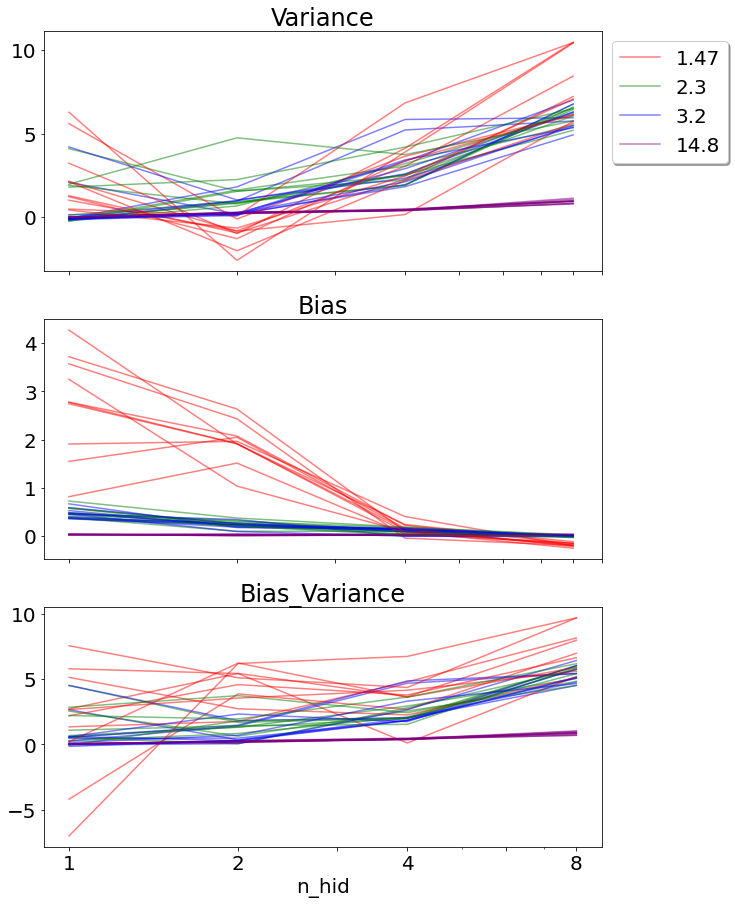

In [14]:
plt.figure(figsize=(10,15))
alpha=0.5
plt.subplot(3, 1, 1)
plt.rcParams["font.size"] = "20"
plt.title('Variance')
plt.xscale('log')
for m in range(10):
    plt.plot(n_hid_list, np.array(list(Variance_dict_CM['1.47'].values())).transpose()[m], c='r', alpha=alpha)
    plt.plot(n_hid_list, np.array(list(Variance_dict_CM['2.3'].values())).transpose()[m], c='g', alpha=alpha)
    plt.plot(n_hid_list, np.array(list(Variance_dict_CM['3.2'].values())).transpose()[m], c='blue', alpha=alpha)
    plt.plot(n_hid_list, np.array(list(Variance_dict_CM['14.8'].values())).transpose()[m], c='purple', alpha=alpha)
plt.xticks([1,2,3,4,5,6,7,8,9],[])
plt.legend(['1.47', '2.3', '3.2', '14.8'],  bbox_to_anchor=(1, 1), 
        ncol=1, fancybox=True, shadow=True)
plt.subplot(3, 1, 2)
plt.rcParams["font.size"] = "20"
plt.title('Bias')
plt.xscale('log')
for m in range(10):
    plt.plot(n_hid_list, np.array(list(Bias_dict['1.47'].values())).transpose()[m], c='r', label ='_nolegend_', alpha=alpha, linestyle='-')
    plt.plot(n_hid_list, np.array(list(Bias_dict['2.3'].values())).transpose()[m], c='g', label ='_nolegend_', alpha=alpha, linestyle='-')
    plt.plot(n_hid_list, np.array(list(Bias_dict['3.2'].values())).transpose()[m], c='blue', label ='_nolegend_', alpha=alpha, linestyle='-')
    plt.plot(n_hid_list, np.array(list(Bias_dict['14.8'].values())).transpose()[m], c='purple', label ='_nolegend_', alpha=alpha, linestyle='-')
plt.xticks([1,2,3,4,5,6,7,8,9],[])

plt.subplot(3, 1, 3)
plt.rcParams["font.size"] = "20"
plt.title('Bias_Variance')
plt.xscale('log')
for m in range(10):
    plt.plot(n_hid_list, np.array(list(Bias_dict['1.47'].values())).transpose()[m]+
             np.array(list(Variance_dict_CM_m['1.47'].values())).transpose()[m], c='r', label = 1.47, alpha=alpha, linestyle='-')
    plt.plot(n_hid_list, np.array(list(Bias_dict['2.3'].values())).transpose()[m]+
             np.array(list(Variance_dict_CM_m['2.3'].values())).transpose()[m], c='g', label = 2.3, alpha=alpha, linestyle='-')
    plt.plot(n_hid_list, np.array(list(Bias_dict['3.2'].values())).transpose()[m]+
             np.array(list(Variance_dict_CM_m['3.2'].values())).transpose()[m], c='blue', label = 3.2, alpha=alpha, linestyle='-')
    plt.plot(n_hid_list, np.array(list(Bias_dict['14.8'].values())).transpose()[m]+
             np.array(list(Variance_dict_CM_m['14.8'].values())).transpose()[m], c='purple', label = 14.8, alpha=alpha, linestyle='-')

plt.xlabel('n_hid')
plt.xticks([1,2,3,4,6,8],[1,2,'',4,'' ,8])


In [15]:
def get_hist(list00):
#     bins=range(int(min(list00)-1), int(max(list00)+1), 1)
    # bins=[0.001*(1.5**x) for x in range(29)]
    y1,x1,_ = plt.hist(list00, bins = 100, histtype='step')
    x1 = 0.5*(x1[1:]+x1[:-1])
    plt.close()
    return x1, y1

In [21]:
JSs={}
for T in T_list:

    JSs[str(T)]={}
    for n_hid in n_hid_list:
        JS=[]
        dE10000=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT5_n_hid={n_hid}_T={T}_dE10000.pkl'.format(base=base, n_hid=n_hid, T=T))
        FE=pd.read_pickle('{base}/loss_IG/3*3/data/3*3_PT5_n_hid={n_hid}_T={T}_FE.pkl'.format(base=base, n_hid=n_hid, T=T))

        for i in range(100):
            i=str(i).zfill(2)
            for j in range(100):
                j=str(j).zfill(2)
                if i>j:
                    if i[0]==j[0]:

                        # if (dE10000[i][j]+dE10000[j][i])<0:
                        #     JS.append(0)
                        # else:
                        JS.append(0.5*(dE10000[i][j]+dE10000[j][i]))
                        # JS.append(dE10000[i][j]-FE['mn'][j[0]][j[1]]+FE['mn'][i[0]][i[1]])
        JSs[str(T)][str(n_hid)]=JS

In [25]:
dE10000

{'00': {'00': 0.0,
  '01': 1.0085523128509521,
  '02': 1.3283271193504333,
  '03': 1.022744059562683,
  '04': 1.2859019041061401,
  '05': 2.0449376702308655,
  '06': 2.4355928897857666,
  '07': 1.8777960240840912,
  '08': -0.43769121170043945,
  '09': 1.294682115316391,
  '10': 1.4343874156475067,
  '11': -0.25440990924835205,
  '12': 0.42025548219680786,
  '13': -1.37985298037529,
  '14': -0.26625680923461914,
  '15': -0.8550305366516113,
  '16': 0.8102152347564697,
  '17': 0.3095031976699829,
  '18': -0.12397006154060364,
  '19': -0.6381098031997681,
  '20': 0.34331345558166504,
  '21': -0.04283440113067627,
  '22': -0.10546135902404785,
  '23': 0.6760848164558411,
  '24': -1.522882342338562,
  '25': 1.2597457766532898,
  '26': 1.6294809877872467,
  '27': 2.004282057285309,
  '28': 1.7364490032196045,
  '29': 1.1801326051354408,
  '30': 0.42021000385284424,
  '31': -0.5334083512425423,
  '32': -0.7262484729290009,
  '33': -0.2395871877670288,
  '34': -0.6579053997993469,
  '35': -1.4

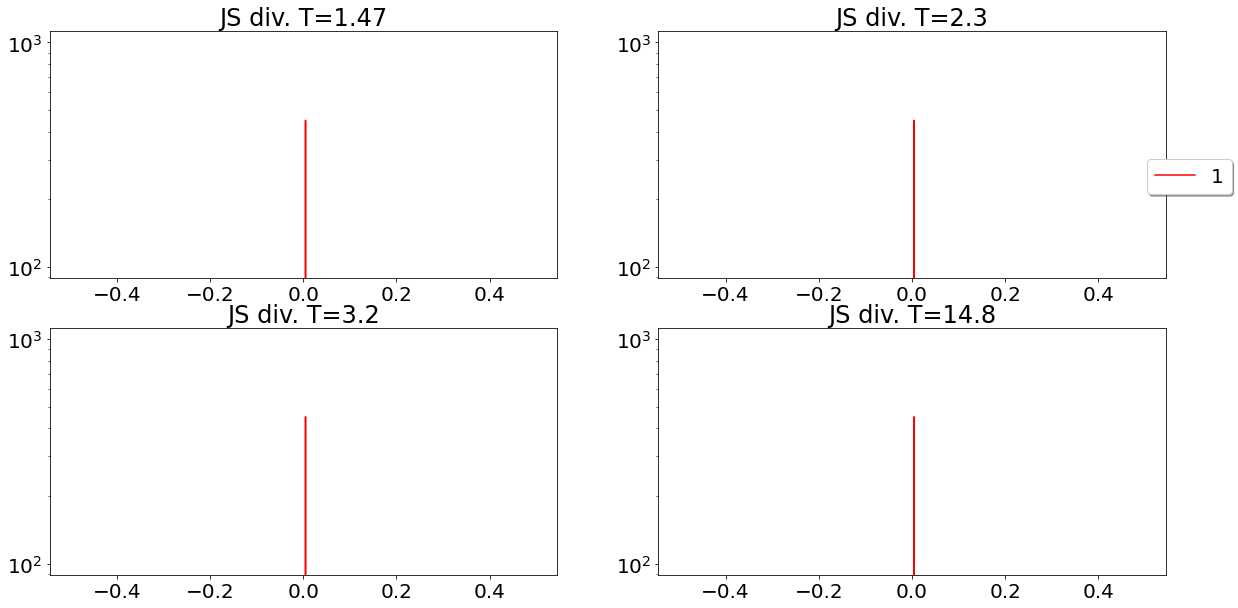

In [23]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(JSs[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(20,10))

for i in range(1, 5):
    T=str(T_list[i-1])
    plt.subplot(2, 2, i)
    plt.rcParams["font.size"] = "20"
    plt.title('JS div. T={T}'.format(T=T))

    plt.plot(x_dict[T][str(1)], y_dict[T][str(1)], c='r', label = 1)
    # plt.plot(x_dict[T][str(2)], y_dict[T][str(2)], c='g', label = 2)
    # plt.plot(x_dict[T][str(4)], y_dict[T][str(4)], c='blue', label = 4)
    # plt.plot(x_dict[T][str(8)], y_dict[T][str(8)], c='purple', label = 8)
    plt.yscale('log')
    # plt.xlim(0, 60)
    # plt.ylim(1, 10000)
plt.legend(loc='lower right', bbox_to_anchor=(1.15,1.5), 
    ncol=1, fancybox=True, shadow=True)

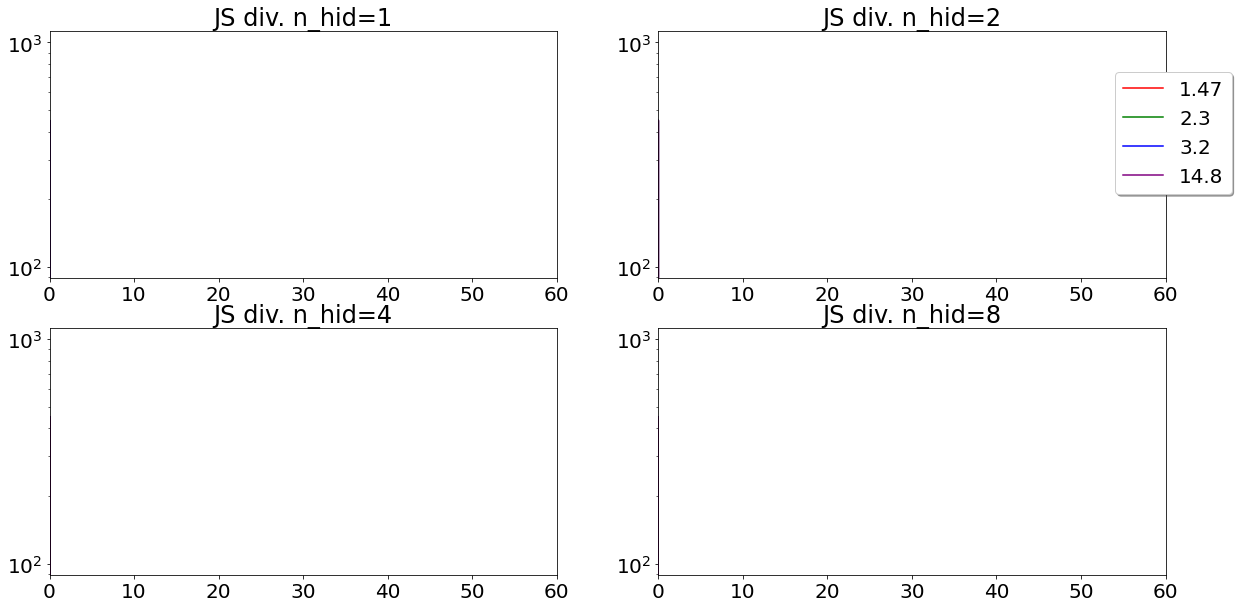

In [18]:
x_dict={}
y_dict={}
for T in T_list:
    x_dict[str(T)]={}
    y_dict[str(T)]={}
    for n_hid in n_hid_list:
        x1, y1=get_hist(JSs[str(T)][str(n_hid)])
        x_dict[str(T)][str(n_hid)]=x1
        y_dict[str(T)][str(n_hid)]=y1

plt.figure(figsize=(20,10))

for i in range(1, 5):
    n_hid=str(n_hid_list[i-1])
    plt.subplot(2, 2, i)
    plt.rcParams["font.size"] = "20"
    plt.title('JS div. n_hid={n_hid}'.format(n_hid=n_hid))

    plt.plot(x_dict[str(1.47)][str(n_hid)], y_dict[str(1.47)][str(n_hid)], c='r', label = 1.47)
    plt.plot(x_dict[str(2.3)][str(n_hid)], y_dict[str(2.3)][str(n_hid)], c='g', label = 2.3)
    plt.plot(x_dict[str(3.2)][str(n_hid)], y_dict[str(3.2)][str(n_hid)], c='blue', label = 3.2)
    plt.plot(x_dict[str(14.8)][str(n_hid)], y_dict[str(14.8)][str(n_hid)], c='purple', label = 14.8)

    plt.yscale('log')
    plt.xlim(0, 60)
plt.legend(loc='lower right', bbox_to_anchor=(1.15, 1.5), 
        ncol=1, fancybox=True, shadow=True)
    # plt.ylim(1, 10000)